### Состояние обучение

Недообучение - алгоритм не смоделировал процесс, не уловил тренд.
Оно менее опасно, чем переобучение (пример торговлей на бирже 5 $ или 50 $)
То есть будет не очень, но это ожидаемо.
Feature engineering помогает бороться с недообучением - для этого хорошо помогает знания в предметной области.


Переобучение - алгоритм не смоделировал процесс, он подстроился под данные
То есть будет не очень, и НЕОЖИДАННО


Способ борьбы с переобучением
1. Регуляризация

Чем больше сумма коэфф-тов, тем выше вероятность переобучения - так сказал Тихонов.
То если у нас много коэфф-тов по 1000, 20000 и т д , то модель скорее всего переобучена


Соотвественно, мы должны модель наказывать, если она дает большие веса.
Влиять на то, как сильно мы наказываем модель за высокие коэф-ты, можно с помощью параметра гамма (Г) - это вес наказывающего коэф-та

Гамма - это регуляризационный параметр

Если увеличиваем наказание, то увеличивается ошибка, то есть недообучение.
Если уменьшаем гамму, то коэф-ты растут, то есть смещаемся в переобучение



Ridge - это регрессия с регуляирзационным параметром

Машинное обучение
1. регрессия (какое-то число, например кол-во убытков) - это ЛИНЕЙНАЯ регрессия
2. классификация (конечное дискретное значение, например отток - ушел/ не ушел) - это ЛОГИСТИЧЕСКАЯ регрессия

обычно задачи регрессии можно свести к классификации.
например предсказание цены можно свести к классификации Дорого-Дешево или к диапазонам


### Логистическая регрессия


На выходе - возвращается вероятность принадлежности к классу.
Например отток: 0 - оставшиеся, 1 - ушедшие.
Для каждого набдюдения на выходе получаем это:
[0.35, 0.65]
то есть 35% - останется, 65% - уйдет

Сигмоида (асимптотическая функция) - строит вероятность принадлежности к классу

Вероятность невозврата кредита - используется логистическая регрессия. Тут как раз применяется вероятность.
И можно управлять решением, при какой вероятности невозврата отказывать в выдаче кредита (15% или 10% и т д) 

In [6]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
df_admit = pd.read_csv('enroll.csv', names=['gre','gpa','admit'])

In [9]:
df_admit.head()

,gre,gpa,admit
0,218.0,5.69,1.0
1,401.0,0.35,0.0
2,497.0,4.99,1.0
3,509.0,4.99,1.0
4,297.0,5.34,1.0


In [10]:
df_admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
gre      100 non-null float64
gpa      100 non-null float64
admit    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


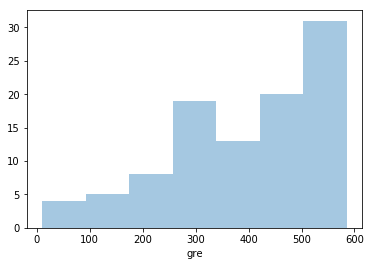

In [11]:
sns.distplot(df_admit.gre, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


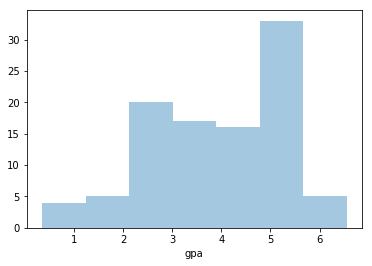

In [12]:
sns.distplot(df_admit['gpa'], kde=False)

Видим, что факторы разного масштаба. У одного значения типа 300-600, а у второго 1-6
По-хорошему, данные НОРМИРУЮТ вначале.


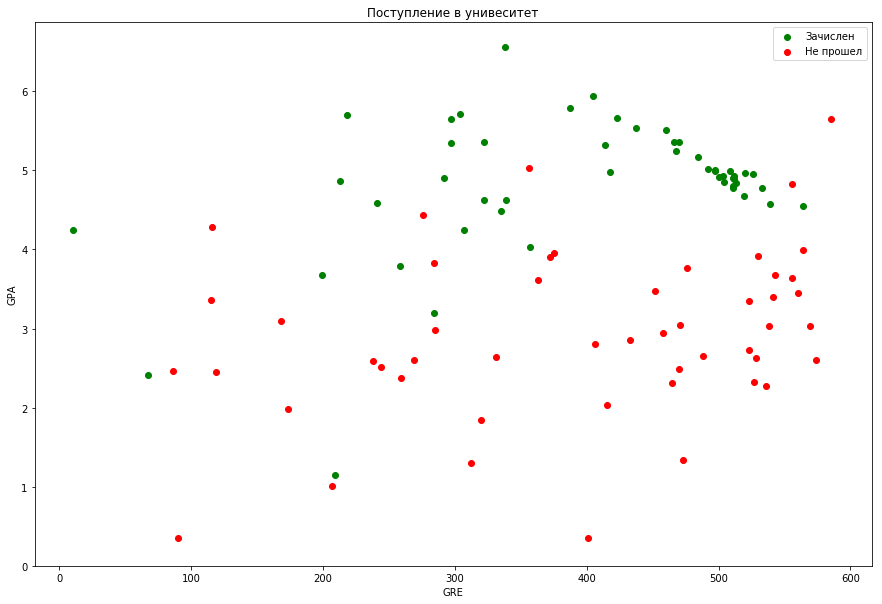

In [19]:
plt.figure(figsize=[15,10])
plt.scatter(df_admit[df_admit.admit == 1]['gre'], # ось х
           df_admit[df_admit.admit == 1]['gpa'], # ось y
           c='green', label='Зачислен')

plt.scatter(df_admit[df_admit.admit == 0]['gre'],
           df_admit[df_admit.admit == 0]['gpa'],
           c='red', label='Не прошел')

plt.xlabel('GRE')
plt.ylabel('GPA')
plt.title('Поступление в унивеситет')
plt.legend();
plt.show()

In [24]:
X = df_admit[['gre', 'gpa']].values
y = df_admit['admit']

In [25]:
logit = linear_model.LogisticRegression(C=1.0, random_state=17, solver='lbfgs')
# solver - это алгоримт
# C - это параметр, обратный регуляризации. Чем больше значение, тем больше вероятность переобучение.
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
logit.coef_

array([[-0.00427424,  1.87817315]])

коэф-ты разного масштаба, потому что у нас не нормированы исходные данные.
также надо смотреть на знак фактора.
мы получили отрицательный. То есть вывод - чем больше баллов по gre, тем меньше вероятность поступления - это какая-то хрень...

In [62]:
def plot_boundary(logit, X_poly, y, grid_step=.01, poly_featurizer=False):
    x_min, x_max = X_poly[:, 0].min() - .1, X_poly[:, 0].max() + .1
    y_min, y_max = X_poly[:, 1].min() - .1, X_poly[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step))
    grid_X = np.c_[xx.ravel(), yy.ravel()]

    if poly_featurizer:
        grid_X_poly = np.c_[grid_X[:, 0], grid_X[:, 1], grid_X[:, 0]**2, grid_X[:, 0]**3, grid_X[:, 1]**2, grid_X[:, 1]**3, 
                            grid_X[:, 0] * grid_X[:, 1], grid_X[:, 0]**2 * grid_X[:, 1], grid_X[:, 0] * grid_X[:, 1]**2]
    else:
        grid_X_poly = grid_X.copy()
    
    Z = logit.predict(grid_X_poly)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

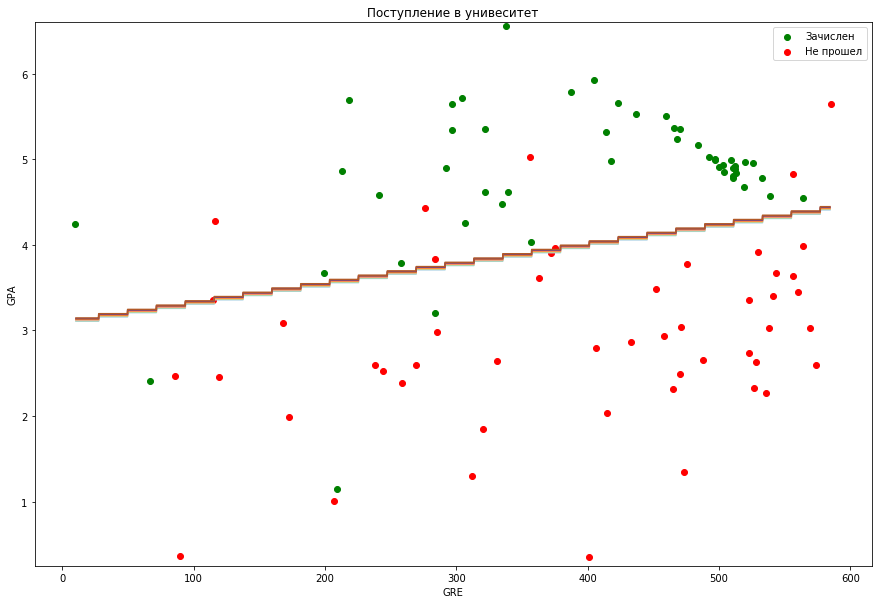

In [37]:
plt.figure(figsize=[15,10])
logit = linear_model.LogisticRegression(C=1.0, n_jobs=-1,  random_state=17, solver='lbfgs')
logit.fit(X, y)
plot_boundary(logit, X, y, grid_step=.05)

plt.scatter(df_admit[df_admit.admit == 1]['gre'], # ось х
           df_admit[df_admit.admit == 1]['gpa'], # ось y
           c='green', label='Зачислен')

plt.scatter(df_admit[df_admit.admit == 0]['gre'],
           df_admit[df_admit.admit == 0]['gpa'],
           c='red', label='Не прошел')

plt.xlabel('GRE')
plt.ylabel('GPA')
plt.title('Поступление в унивеситет')
plt.legend();
plt.show()



In [39]:
logit.predict([[500, 4]]) # вывод принадлежности к классу

array([0.])

In [40]:
logit.predict_proba([[500, 4]])

array([[0.60393805, 0.39606195]])

In [41]:
# 60% не поступим, 40% поступим 

#### Линейную модель нужно использовать, когда нужно использовать максимально надежный коэффициент, например в медицине

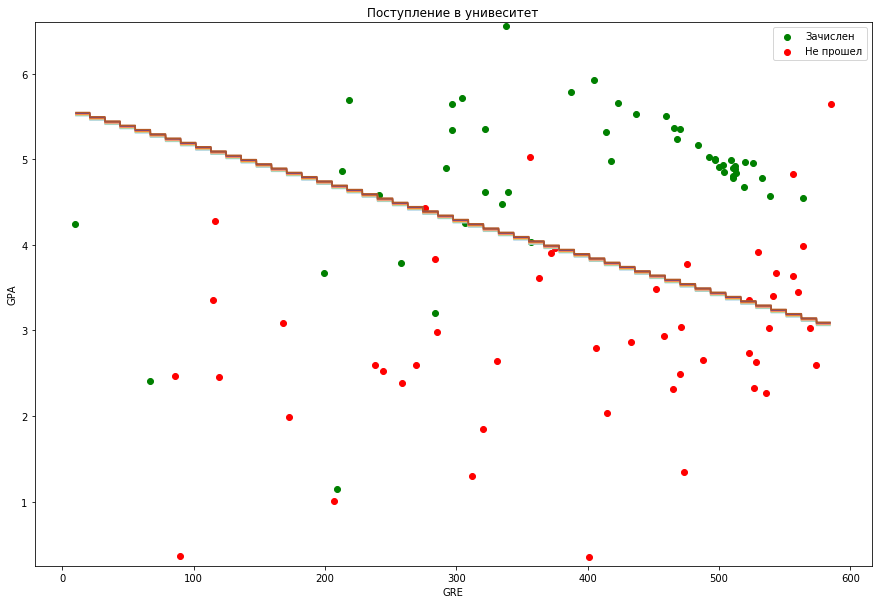

In [64]:
plt.figure(figsize=[15,10])
logit = linear_model.LogisticRegression(C=1e-3, n_jobs=-1,  random_state=17, solver='lbfgs')
logit.fit(X, y)
plot_boundary(logit, X, y, grid_step=.05)

plt.scatter(df_admit[df_admit.admit == 1]['gre'], # ось х
           df_admit[df_admit.admit == 1]['gpa'], # ось y
           c='green', label='Зачислен')

plt.scatter(df_admit[df_admit.admit == 0]['gre'],
           df_admit[df_admit.admit == 0]['gpa'],
           c='red', label='Не прошел')

plt.xlabel('GRE')
plt.ylabel('GPA')
plt.title('Поступление в унивеситет')
plt.legend();
plt.show()


In [44]:
logit.coef_

array([[0.00019418, 0.04475676]])

мы сильно уменьшили коэф-ты 

In [51]:
df_mod = df_admit.copy()

In [52]:
df_mod['gre2'] = df_mod['gre']**2
df_mod['gre3'] = df_mod['gre']**3

df_mod['gpa2'] = df_mod['gpa']**2
df_mod['gpa3'] = df_mod['gpa']**3

df_mod['gre_gpa'] = df_mod['gre'] * df_mod['gpa']
df_mod['gre2_gpa'] = df_mod['gre']**2 * df_mod['gpa']
df_mod['gre_gpa2'] = df_mod['gre'] * df_mod['gpa']**2

In [53]:
df_mod.head()

,gre,gpa,admit,gre2,gre3,gpa2,gpa3,gre_gpa,gre2_gpa,gre_gpa2
0,218.0,5.69,1.0,47524.0,10360232.0,32.3761,184.220009,1240.42,270411.56,7057.9898
1,401.0,0.35,0.0,160801.0,64481201.0,0.1225,0.042875,140.35,56280.35,49.1225
2,497.0,4.99,1.0,247009.0,122763473.0,24.9001,124.251499,2480.03,1232574.91,12375.3497
3,509.0,4.99,1.0,259081.0,131872229.0,24.9001,124.251499,2539.91,1292814.19,12674.1509
4,297.0,5.34,1.0,88209.0,26198073.0,28.5156,152.273304,1585.98,471036.06,8469.1332


In [55]:
df_mod.shape

(100, 10)

In [57]:
X_poly = df_mod.drop('admit', axis=1).values
y_poly = np.array(df_mod['admit'])

In [58]:
y_poly

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

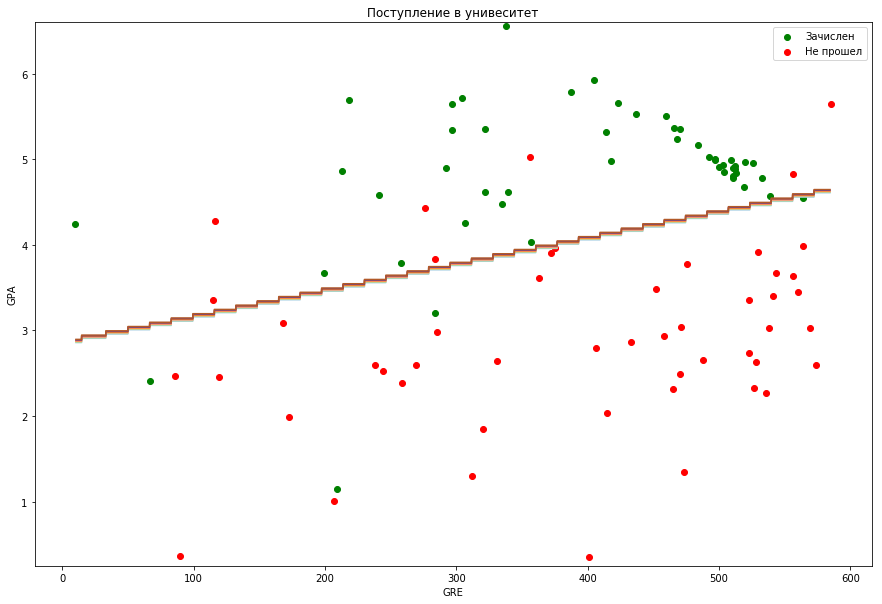

In [65]:
plt.figure(figsize=[15,10])
logit = linear_model.LogisticRegression(C=1.0, n_jobs=-1, random_state=17, solver='lbfgs')
logit.fit(X_poly, y_poly)
plot_boundary(logit, X_poly, y_poly, grid_step=0.05, poly_featurizer=True)

plt.scatter(df_mod[df_mod.admit == 1]['gre'], # ось х
           df_mod[df_mod.admit == 1]['gpa'], # ось y
           c='green', label='Зачислен')

plt.scatter(df_mod[df_admit.admit == 0]['gre'],
           df_mod[df_admit.admit == 0]['gpa'],
           c='red', label='Не прошел')

plt.xlabel('GRE')
plt.ylabel('GPA')
plt.title('Поступление в унивеситет')
plt.legend();
plt.show()